In [2]:
from jupyterthemes import jtplot
jtplot.style('grade3', context='paper', fscale=1.4)

import matplotlib.pyplot as plt 
% matplotlib inline
import json
import pickle
import numpy as np
import nltk
import string
from sklearn.manifold import TSNE                                                                                                                                                                        
from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
colors = colors.values()
import scipy.special
import math

In [2]:
scores = json.load(open('coco/generated_captions_viterbi_confusion_scored_distrib.json'))

In [3]:
gen = json.load(open('coco/generated_captions_viterbi_confusion.json'))

In [4]:
keys_gen = [s['id'] for s in gen]
print('%d %d' % (len(keys_gen), len(np.unique(keys_gen))))
keys = [s['id'] for s in scores]


123287 123287


In [5]:
gt_scores = []
for s in scores:
    gt_scores += s['scores'][:5]
    
aug_scores = []
for s in scores:
    aug_scores += s['scores'][5:]

In [6]:
len(gt_scores), len(aug_scores)

(616435, 3082453)

/home/thoth/melbayad/scratch/Env/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


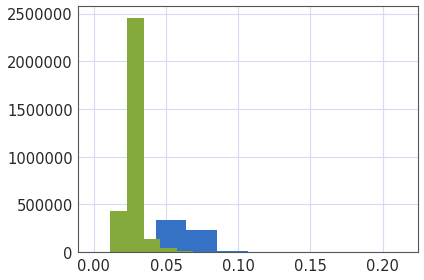

In [7]:
plt.hist(gt_scores)
plt.hist(aug_scores)
plt.savefig('hist_scores.png', bbox_inches='tight')

In [8]:
Glove = pickle.load(open('Glove/glove_dict.pkl', "rb"), encoding='"ISO-8859-1', fix_imports=False)

In [9]:
Glove['a'].shape

(300,)

In [10]:
def tokenize(sentence):
    return nltk.word_tokenize(str(sentence).lower().translate(string.punctuation)) 

def glove_embed_sent(caption):
    embed = np.zeros((300, ), dtype='float32')
    for w in tokenize(caption):
        try:
            embed += Glove[w.lower()]
        except:
            print("Missing word ", w.lower())
    return embed

def tsne_2d(X):
    tsne_model = TSNE(n_components=2, random_state=0, verbose=2)
    X2d = tsne_model.fit_transform(X)
    return X2d
    

In [11]:
X300= []
count = 0
for s in scores:
    for cap in s['captions']:
        X300.append(glove_embed_sent(cap))
        count += 1
    if count > 400:
        break

In [12]:
X300 = np.array(X300)
X300.shape


(420, 300)

In [13]:
X2 = tsne_2d(X300)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 420 / 420
[t-SNE] Mean sigma: 8.392040
[t-SNE] Iteration 25: error = 0.4583020, gradient norm = 0.0210921
[t-SNE] Iteration 50: error = 0.5081300, gradient norm = 0.0196768
[t-SNE] Iteration 75: error = 0.3010046, gradient norm = 0.0150309
[t-SNE] Iteration 100: error = 0.4842031, gradient norm = 0.0161269
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.484203
[t-SNE] Iteration 125: error = 0.2443056, gradient norm = 0.0135900
[t-SNE] Iteration 150: error = 0.5437925, gradient norm = 0.0165374
[t-SNE] Iteration 175: error = 1.0666249, gradient norm = 0.0223757
[t-SNE] Iteration 175: did not make any progress during the last 30 episodes. Finished.
[t-SNE] Error after 175 iterations: 0.484203


In [19]:
colors = list(colors)

/home/thoth/melbayad/scratch/Env/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


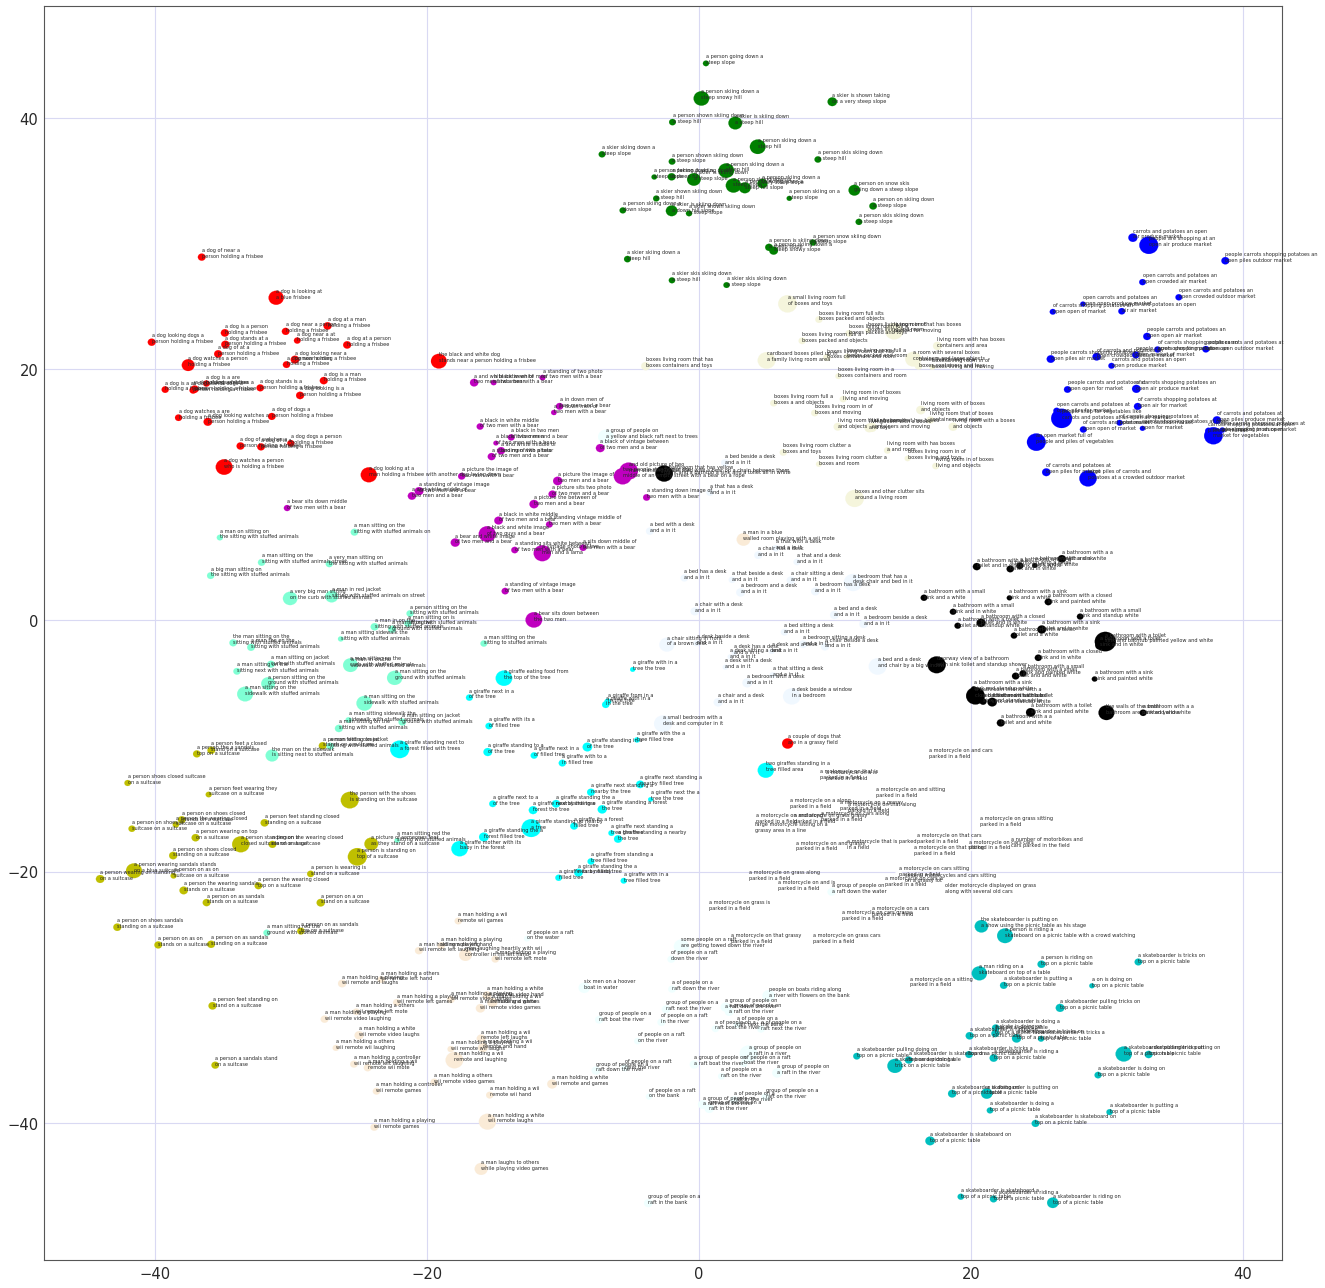

In [20]:
plt.figure(figsize=(18,18))
ax = plt.gca()
ax.cla()
count = 0
ref = 0
while count < len(X2):
    for s in scores:
        for cap, score in zip(s['captions'], s['scores']):
            if count < len(X2):
                # print cap, '(%.2f)' % score, "@", X2[count]
                circ = plt.Circle((X2[count, 0], X2[count, 1]), 10 * score, color=colors[ref])
                ax.add_artist(circ)
                ax.plot(X2[count, 0], X2[count, 1], '.', c=colors[ref])
                cap = cap.split(' ')
                cap = ' '.join(cap[:5]) + '\n' + ' '.join(cap[5:])
                plt.text(X2[count,0], X2[count,1], cap, fontsize=5)
                count += 1 
        ref += 1
plt.savefig('aug_scores_distrib.png', bbox_inches='tight')

In [1]:
def temp_distrib(tau, m=16, v=32):
    temp_scores = [scipy.special.binom(m, e) * ((v-1)*math.exp(-1/tau))**(e-m) for e in range(m+1)]
    sum(temp_scores)
    temp_scores = temp_scores / sum(temp_scores)
    return temp_scores


/home/thoth/melbayad/scratch/Env/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


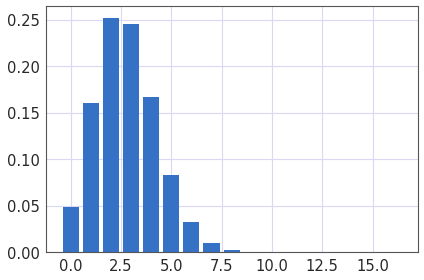

In [4]:
dist = np.arange(17)
# Typical value between 0.2 and 0.3
tau = 0.2
tau_a = temp_distrib(tau)
plt.figure()
plt.bar(dist, tau_a)

plt.savefig('distrib.png', bbox_inches="tight")

In [231]:

v = 30
m = 16
d = [scipy.special.binom(m, e) * ((v-1)*math.exp(-1/tau))**(e-m) for e in range(m+1)]
d = d/sum(d)

In [247]:

print d
s = np.random.choice(size=5, a=np.arange(m+1), p=d)
print "Selected ", s.shape

[  5.75155510e-02   1.79817045e-01   2.63522503e-01   2.40297956e-01
   1.52601579e-01   7.15642059e-02   2.56367448e-02   7.15633114e-03
   1.57314422e-03   2.73238319e-04   3.73736258e-05   3.98335843e-06
   3.24312534e-07   1.94987136e-08   8.16440929e-10   2.12710581e-11
   2.59773412e-13]
Selected  (5,)


In [249]:
np.repeat(s, 10)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5])

In [18]:
R = pickle.load(open('../save/resnet50_mil_corr/infos.pkl','rb'))

In [19]:
R.keys()


dict_keys(['opt', 'vocab', 'loss_history', 'best_val_score', 'lr_history', 'iter', 'iterators', 'epoch', 'val_result_history'])

In [20]:
RR = R['val_result_history']

In [21]:
RR.keys()


dict_keys([0, 48000, 176000, 260000, 168000, 252000, 76000, 160000, 244000, 68000, 152000, 236000, 60000, 144000, 228000, 312000, 52000, 4000, 220000, 304000, 136000, 128000, 212000, 296000, 36000, 120000, 204000, 288000, 28000, 112000, 196000, 280000, 20000, 104000, 188000, 272000, 12000, 96000, 180000, 8000, 84000, 264000, 88000, 172000, 256000, 80000, 164000, 248000, 72000, 156000, 240000, 64000, 148000, 232000, 316000, 56000, 140000, 224000, 92000, 44000, 132000, 216000, 300000, 308000, 40000, 124000, 208000, 292000, 32000, 116000, 200000, 284000, 24000, 108000, 192000, 276000, 16000, 100000, 184000, 268000])

In [22]:
H = RR[268000]['predictions']

In [30]:
def hamming_proba(tau, m=16, v=9487):
    logp = [d * math.log(v-1) + math.log(scipy.special.binom(m, d)) - m * math.log(v) - d/ tau for d in range(m+1)] 
    p = [math.exp(lp) for lp in logp]
    normp = [x/sum(p) for x in p]
    return normp


In [38]:
sum(hamming_proba(0.8))
colors

dict_values([(0, 0, 1), (0, 0.5, 0), (1, 0, 0), (0, 0.75, 0.75), (0.75, 0, 0.75), (0.75, 0.75, 0), (0, 0, 0), (1, 1, 1), '#F0F8FF', '#FAEBD7', '#00FFFF', '#7FFFD4', '#F0FFFF', '#F5F5DC', '#FFE4C4', '#000000', '#FFEBCD', '#0000FF', '#8A2BE2', '#A52A2A', '#DEB887', '#5F9EA0', '#7FFF00', '#D2691E', '#FF7F50', '#6495ED', '#FFF8DC', '#DC143C', '#00FFFF', '#00008B', '#008B8B', '#B8860B', '#A9A9A9', '#006400', '#A9A9A9', '#BDB76B', '#8B008B', '#556B2F', '#FF8C00', '#9932CC', '#8B0000', '#E9967A', '#8FBC8F', '#483D8B', '#2F4F4F', '#2F4F4F', '#00CED1', '#9400D3', '#FF1493', '#00BFFF', '#696969', '#696969', '#1E90FF', '#B22222', '#FFFAF0', '#228B22', '#FF00FF', '#DCDCDC', '#F8F8FF', '#FFD700', '#DAA520', '#808080', '#008000', '#ADFF2F', '#808080', '#F0FFF0', '#FF69B4', '#CD5C5C', '#4B0082', '#FFFFF0', '#F0E68C', '#E6E6FA', '#FFF0F5', '#7CFC00', '#FFFACD', '#ADD8E6', '#F08080', '#E0FFFF', '#FAFAD2', '#D3D3D3', '#90EE90', '#D3D3D3', '#FFB6C1', '#FFA07A', '#20B2AA', '#87CEFA', '#778899', '#778899',

0.092 [0.07029275633587241, 0.20301189339426742, 0.274836032685826, 0.23151086490420555, 0.13581435146671555, 0.058836635690373035, 0.019470638433265543, 0.005020801801912568, 0.0010195687738301267, 0.00016358931323664084, 2.0670162692854957e-05, 2.035135761839641e-06, 1.5306400400962715e-07, 8.501207850697372e-09, 3.288249625828143e-10, 7.913970766569054e-12, 8.928230311656617e-14]


/home/thoth/melbayad/scratch/Env/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


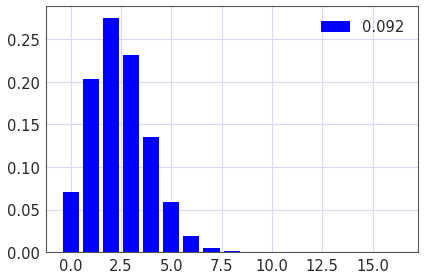

In [52]:
taus = [0.092]
dist = np.arange(17)
plt.figure()
for e, tau in enumerate(taus):
    y = hamming_proba(tau)
    print(tau, y)
    plt.bar(dist, y, color=list(colors)[e], label=tau)
plt.legend()


In [26]:
normp = [x/sum(p) for x in p]

In [27]:
normp

[2.606675747610988e-55,
 1.0753086599746433e-50,
 2.079316291202361e-46,
 2.5018051755571064e-42,
 2.096346158815106e-38,
 1.297180430445422e-34,
 6.131517503881597e-31,
 2.2583751261245256e-27,
 6.550504566067112e-24,
 1.5012339617168996e-20,
 2.7093965293084455e-17,
 3.810283453683633e-14,
 4.0932869655873385e-11,
 3.247244433459727e-08,
 1.794049202092922e-05,
 0.0061673590881643064,
 0.9938146679063995]

In [56]:
d= 3
tau= 0.5
math.exp(-d/tau)

0.0024787521766663585